In [15]:
# lines = cv2.HoughLines(dilated_edges,1,np.pi/180, 200)
# rgb_img_copy = rgb_img.copy()
# print(lines.shape)
# for r,theta in lines[0]: 
#     a = np.cos(theta) 
#     b = np.sin(theta) 
#     x0 = a*r 
#     y0 = b*r 
#     x1 = int(x0 + 1*(-b)) 
#     y1 = int(y0 + 1*(a)) 
#     x2 = int(x0 - 1000*(-b)) 
#     y2 = int(y0 - 10*(a)) 
#     cv2.line(rgb_img_copy,(x1,y1), (x2,y2), (255,0,0),5)

(1669, 1, 2)


In [115]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2


Text(0.5, 1.0, 'Gray Image ')

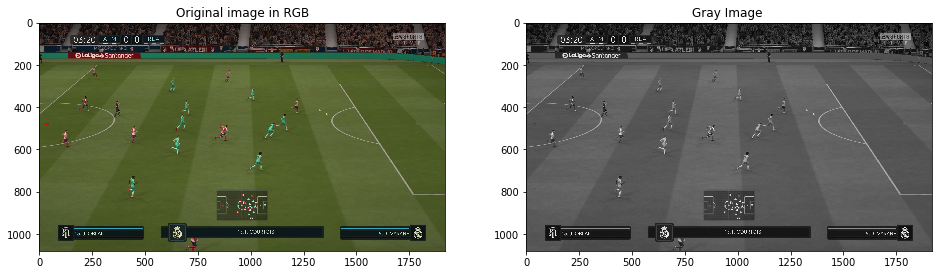

In [116]:
img = cv2.imread('images/topCrowd1.jpg')

# Convert BGR (cv2 read Mode) to RGB (matplotlib plot mode)
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(16,16))

plt.subplot(121)
plt.imshow(rgb_img)
plt.title("Original image in RGB")

# Convert it to GrayScale to do the Canny Method
gray = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY) 
plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image ")

Text(0.5, 1.0, 'Dilated Edges ')

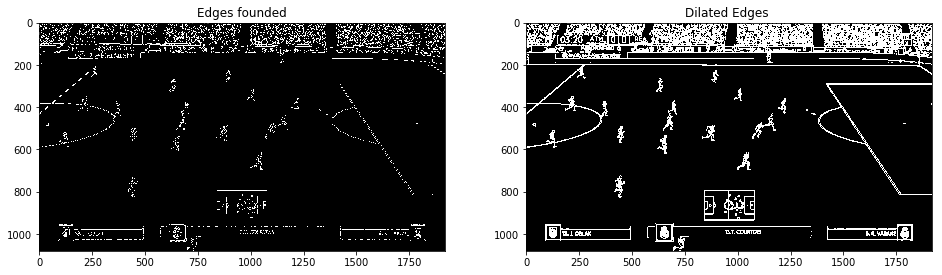

In [117]:
# Getting the Edges Detect by Canny Method
edges_50_100 = cv2.Canny(gray,50,100)
edges_50_100[np.where(edges == 255)] = 1

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(edges_50_100, cmap='gray')
plt.title("Edges founded")

# Doing 
from skimage import morphology
dilated_edges = morphology.binary_dilation(edges_50_100, morphology.square(3)).astype(np.uint8)
plt.subplot(122)
plt.imshow(dilated_edges, cmap='gray')
plt.title("Dilated Edges ")

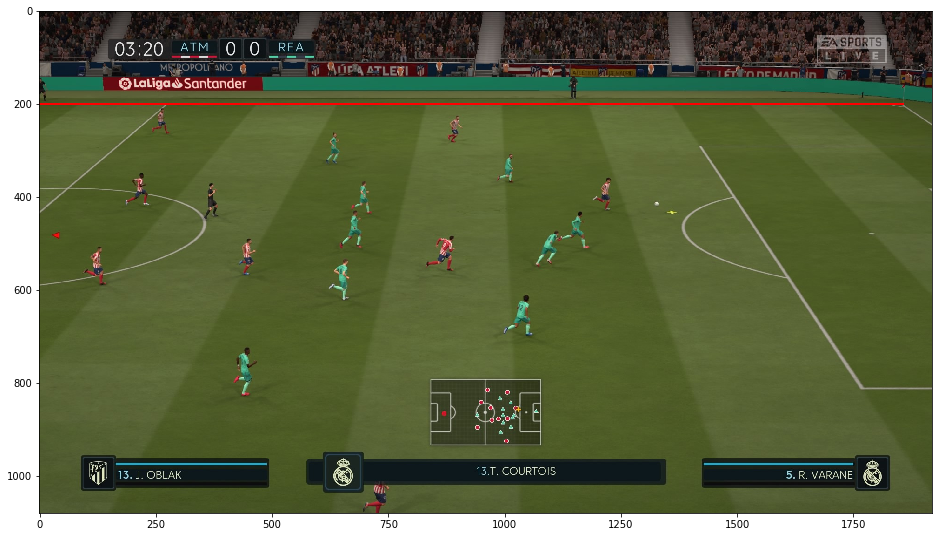

In [118]:
lines = cv2.HoughLinesP(dilated_edges,1,np.pi/180, 200, minLineLength=150,maxLineGap=10)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(rgb_img,(x1,y1), (x2,y2), (255,0,0),2)
# for line in lines:
#     x1,y1,x2,y2 = line[0]
#     cv2.line(rgb_img,(x1,y1), (x2,y2), (255,0,0),2)
plt.figure(figsize=(16,16))
plt.imshow(rgb_img)

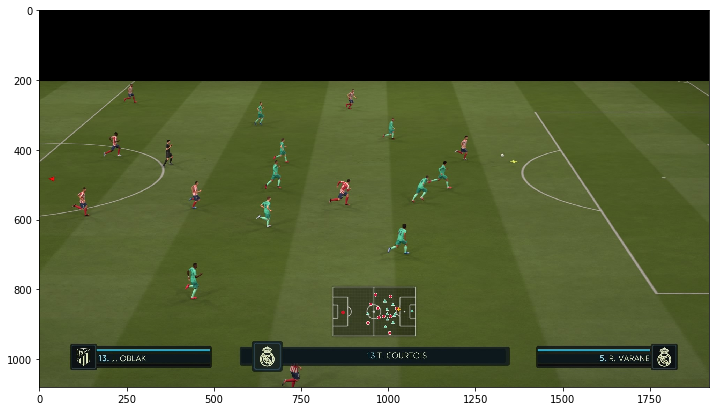

In [119]:
img2 = rgb_img.copy()
img2[:y2+2,:] = 0
plt.figure(figsize=(12,12))
plt.imshow(img2)